In [42]:
#import libraries
#utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
import math
from matplotlib.cm import ScalarMappable

#models
from sklearn.ensemble import RandomForestRegressor

#scores
from sklearn.metrics import r2_score

#TODO: to check for duplicated and useless
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
df_dev=pd.read_csv("development.csv")
df_eval=pd.read_csv("evaluation.csv",index_col="Id")
df_dev['Id']=df_dev.index
df_dev.set_index('Id',inplace=True)


In [ ]:
display(df_dev)

In [ ]:
df_dev.isna().any(axis=0)
col_area=df_dev.filter(like="pmax",axis=1)
display(col_area.max())
display(col_area.min())

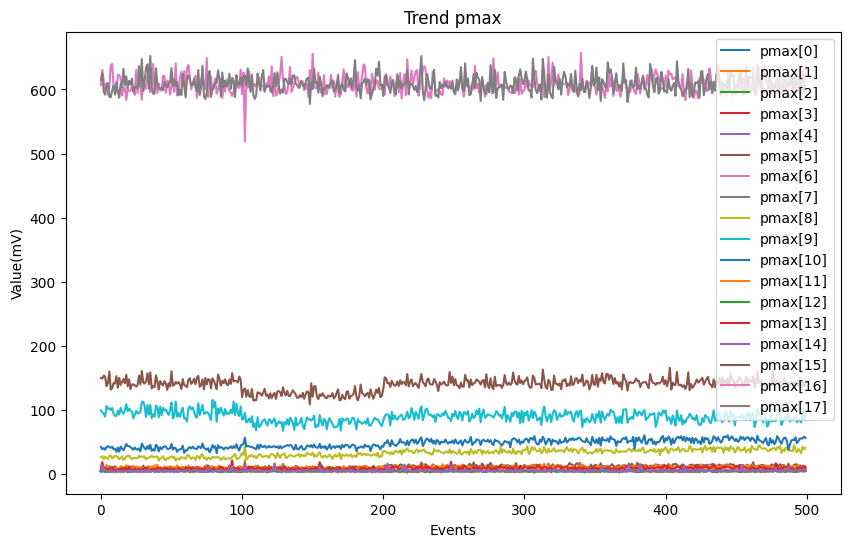

In [44]:
df=df_dev.filter(regex="^pmax.*").head(500)
plt.figure(figsize=(10,6))
for colonna in df.columns:
    plt.plot(df.index,df[colonna],label=colonna)
plt.xlabel('Events')
plt.ylabel('Value(mV)')
plt.title('Trend pmax')
plt.legend()
plt.savefig('distribution_pmax')
plt.show()

In [ ]:
#look for outliers with boxplots
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_dev['pmax[1]'].head(500))


#let's filter data
mask_pmax_1=0
# show plot
plt.show()

In [55]:
#df2=df_dev.filter(regex="^pmax.*").
#df2
pos_df[pos_df['sensor']==0]['x']

0    395.001875
Name: x, dtype: float64

/home/omio/.local/lib/python3.8/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/omio/.local/lib/python3.8/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/home/omio/.local/lib/python3.8/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/omio/.local/lib/python3.8/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self

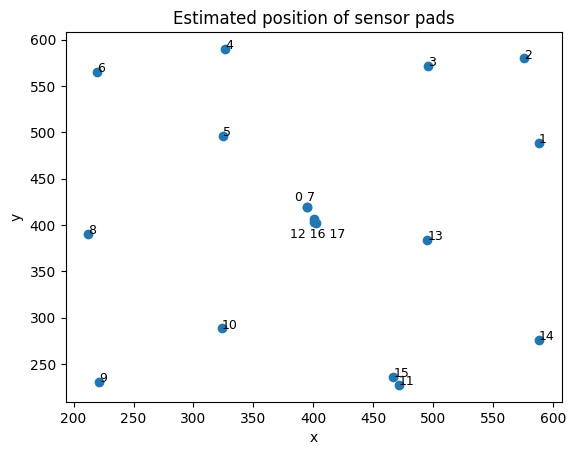

In [79]:
#To determine the position of our sensors, we decided to consider the highest 8000 samples for each sensor and calculate average position. This allowed use to have a
#better understanding of which features are sensors and which are just noise.
pos_df=pd.DataFrame()
p = re.compile('pmax.*')
area_list=[ s for s in df_dev.columns if p.match(s) ]
area_list
i=0
for c in area_list:
    tmp=df_dev[[c,'x','y']].sort_values(by=[c],ascending=False).head(8000)
    x=tmp['x'].mean()
    y=tmp['y'].mean()
    dict={"sensor":i,"x":x,"y":y}
    dict_df=pd.DataFrame([dict])
    pos_df=pd.concat([pos_df,dict_df],ignore_index=True)
    i=i+1

plt.scatter(pos_df['x'],pos_df['y'])
[plt.text(x,y,t,fontsize=9) for x, y,t in zip(pos_df['x'], pos_df['y'],pos_df['sensor'])if t not in [0,7,12,16,17]]
#custom code to handle overlapping labels for these pads.
custom_text="0 7"
plt.text(pos_df[pos_df['sensor']==0]['x']-10,pos_df[pos_df['sensor']==0]['y']+7,custom_text,fontsize=9)
custom_text="12 16 17"
plt.text(pos_df[pos_df['sensor']==12]['x']-20,pos_df[pos_df['sensor']==12]['y']-20,custom_text,fontsize=9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Estimated position of sensor pads')
plt.savefig('Estimated_position_of_sensor_pads')
plt.show()

In [ ]:
#we can cluster sensor as:
#'pmax[9]','pmax[8]','pmax[6]','pmax[4]','pmax[5]','pmax[10]','pmax[15]', 'pmax[13]', 'pmax[3]', 'pmax[2]','pmax[1]','pmax[2]'
list(pos_df['sensor'])

In [39]:
pos_df

,sensor,x,y
0,0,395.001875,418.952500
1,1,587.968125,488.286875
2,2,575.890000,579.881250
3,3,495.275625,571.546875
4,4,326.317500,590.020000
5,5,324.810000,496.416875
6,6,219.416250,565.348750
7,7,395.007500,419.396250
8,8,212.183750,390.585000
9,9,221.578125,230.795625


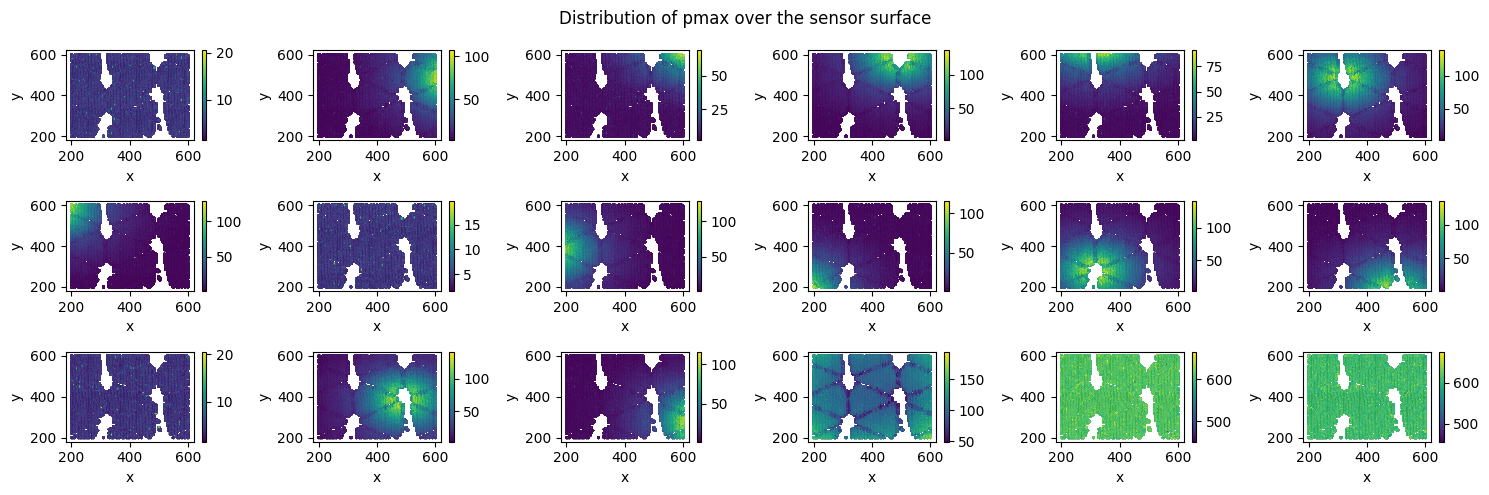

In [77]:
#plot to see correlation between x,y and pmax
#from the following graph, we want to understand the distribution of hit position for each feature.
fig, ax = plt.subplots(3, 6,figsize=(15,5))
fig.suptitle('Distribution of pmax over the sensor surface')

for ii in range(len(area_list)):
    i=math.trunc(ii/6)
    j=ii%6
    ax[i][j].scatter(df_dev['x'],df_dev['y'], c=df_dev[area_list[ii]], s=1)
    norm = plt.Normalize(df_dev[area_list[ii]].min(), df_dev[area_list[ii]].max())
    sm =  ScalarMappable(norm=norm)
    sm.set_array([])
    plt.colorbar(sm,ax=ax[i,j])
    ax[i, j].set_xlabel('x')
    ax[i, j].set_ylabel('y')
for i in range(3):
    ax[i, 5].set_xlabel('x')
    ax[i, 5].set_ylabel('y')
plt.tight_layout()
plt.savefig('distribution_x,y')
plt.show()

In [ ]:
#We can confirm again that some of these features contain just noise (like pmax16,pmax17,pmax0,pmax7,pmax12)

In [ ]:
#get features from decision tree
df_new_x=df_dev.drop(columns=['x','y'])
#create x,y dataset for training and evaluation
X_train_valid= df_new_x.values
y_train_valid= df_dev[['x','y']].values

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid, shuffle=True, random_state=42)


In [ ]:
#decision tree to see initial feature importance
clf = tree.DecisionTreeRegressor(random_state=42)
clf = clf.fit(X_train, y_train)
best_params=sorted(zip(df_new_x.columns, clf.feature_importances_), key=lambda x: x[1],reverse=True)[:30]
best_params= [x[0] for x in best_params]

In [ ]:
#plot to see after last three removed
df=df_new.filter(regex="^pmax.*").head(500)
plt.figure(figsize=(10,6))
for colonna in df.columns:
    plt.plot(df.index,df[colonna],label=colonna)
plt.xlabel('Righe')
plt.ylabel('Valore')
plt.title('Variazione delle colonne nel tempo')
plt.legend()
plt.show()

In [3]:
best_features_25=['pmax[8]', 'pmax[11]','pmax[10]', 'pmax[5]',
 'pmax[13]','pmax[9]','pmax[2]','pmax[1]','pmax[4]', 
    'pmax[6]','pmax[14]','pmax[15]','pmax[3]',
'negpmax[13]','negpmax[11]','negpmax[3]',
 'negpmax[10]','negpmax[8]','negpmax[1]','negpmax[5]',
 'negpmax[6]','negpmax[14]','negpmax[4]','negpmax[9]',
 'negpmax[2]','x','y']
df_new=df_dev[best_features_25]
pmax_list=['pmax[8]', 'pmax[11]','pmax[10]','pmax[15]' ,'pmax[5]','pmax[13]','pmax[9]','pmax[2]','pmax[1]','pmax[4]', 'pmax[6]','pmax[14]','pmax[3]']
negpmax_list=['negpmax[13]','negpmax[11]','negpmax[3]','negpmax[10]','negpmax[8]','negpmax[1]','negpmax[5]','negpmax[6]','negpmax[14]','negpmax[4]','negpmax[9]','negpmax[2]']

In [ ]:
#'pmax[9]','pmax[8]','pmax[6]','pmax[4]','pmax[5]','pmax[10]','pmax[15]', 'pmax[13]', 'pmax[3]', 'pmax[2]','pmax[1]','pmax[14]'
#for experiment
best_features_25=['pmax[9]','pmax[8]','pmax[6]','pmax[4]','pmax[5]','pmax[10]','pmax[11]', 'pmax[13]', 'pmax[3]', 'pmax[2]','pmax[1]','pmax[14]',
                  'negpmax[9]','negpmax[8]','negpmax[6]','negpmax[4]','negpmax[5]','negpmax[10]','negpmax[11]', 'negpmax[13]', 'negpmax[3]', 'negpmax[2]','negpmax[1]','negpmax[14]',
                  'x','y']
df_new=df_dev[best_features_25]
pmax_list=['pmax[9]','pmax[8]','pmax[6]','pmax[4]','pmax[5]','pmax[10]','pmax[11]', 'pmax[13]', 'pmax[3]', 'pmax[2]','pmax[1]','pmax[14]']
negpmax_list=[ 'negpmax[9]','negpmax[8]','negpmax[6]','negpmax[4]','negpmax[5]','negpmax[10]','negpmax[11]', 'negpmax[13]', 'negpmax[3]', 'negpmax[2]','negpmax[1]','negpmax[14]']

In [35]:
#Data augmentation:
def MF_Formula(x,y,x_sens,y_sens):
    
amplitudes=np.linspace(10,160,num=101)

#area of interest
xmin=300
xmax=550
ymin=300
ymax=550
for a in amplitudes:
    for i in range (xmin,xmax+1):
        for j in range (ymin,ymax+1):
            for s in sensors
            pass
amplitudes

array([ 10. ,  11.5,  13. ,  14.5,  16. ,  17.5,  19. ,  20.5,  22. ,
        23.5,  25. ,  26.5,  28. ,  29.5,  31. ,  32.5,  34. ,  35.5,
        37. ,  38.5,  40. ,  41.5,  43. ,  44.5,  46. ,  47.5,  49. ,
        50.5,  52. ,  53.5,  55. ,  56.5,  58. ,  59.5,  61. ,  62.5,
        64. ,  65.5,  67. ,  68.5,  70. ,  71.5,  73. ,  74.5,  76. ,
        77.5,  79. ,  80.5,  82. ,  83.5,  85. ,  86.5,  88. ,  89.5,
        91. ,  92.5,  94. ,  95.5,  97. ,  98.5, 100. , 101.5, 103. ,
       104.5, 106. , 107.5, 109. , 110.5, 112. , 113.5, 115. , 116.5,
       118. , 119.5, 121. , 122.5, 124. , 125.5, 127. , 128.5, 130. ,
       131.5, 133. , 134.5, 136. , 137.5, 139. , 140.5, 142. , 143.5,
       145. , 146.5, 148. , 149.5, 151. , 152.5, 154. , 155.5, 157. ,
       158.5, 160. ])

In [4]:
df_new['sum_pmax']=df_new[pmax_list].sum(axis=1)
df_new['sum_negpmax']=df_new[negpmax_list].sum(axis=1)
for column in pmax_list:
    norm_name=column+"_norm"
    df_new[norm_name]=df_new[column]/df_new['sum_pmax']
for column in negpmax_list:
    norm_name=column+"_norm"
    df_new[norm_name]=df_new[column]/df_new['sum_negpmax']

/tmp/ipykernel_3444/4015637481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sum_pmax']=df_new[pmax_list].sum(axis=1)
/tmp/ipykernel_3444/4015637481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sum_negpmax']=df_new[negpmax_list].sum(axis=1)
/tmp/ipykernel_3444/4015637481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [5]:
df_new_x=df_new.drop(columns=['x','y'])
df_new_x=df_new_x.round(4)
df_new_x

,pmax[8],pmax[11],pmax[10],pmax[5],pmax[13],pmax[9],pmax[2],pmax[1],pmax[4],pmax[6],...,negpmax[3]_norm,negpmax[10]_norm,negpmax[8]_norm,negpmax[1]_norm,negpmax[5]_norm,negpmax[6]_norm,negpmax[14]_norm,negpmax[4]_norm,negpmax[9]_norm,negpmax[2]_norm
Id,,,,,,,,,,,,,,,,,,,,,
0,26.5813,12.4385,42.0684,9.3223,7.4549,99.3613,6.0845,5.4092,4.8930,3.0773,...,0.0903,0.0750,0.0594,0.0674,0.0741,0.0732,0.0673,0.0685,0.2161,0.0757
1,27.7970,12.3262,38.6902,9.3739,18.4725,96.0626,4.5073,4.4143,5.5494,5.4244,...,0.0413,0.1491,0.0893,0.0360,0.0296,0.0355,0.0392,0.0355,0.4470,0.0288
2,23.1637,9.2533,40.3371,7.4999,7.3367,93.7674,5.3842,4.5672,3.7954,5.8462,...,0.0322,0.1670,0.0818,0.0423,0.0378,0.0355,0.0273,0.0336,0.4437,0.0279
3,26.5929,10.9009,37.7968,10.4223,8.4507,89.6204,4.1656,5.0191,4.8487,5.1579,...,0.0358,0.1519,0.0749,0.0304,0.0354,0.0259,0.0401,0.0287,0.4508,0.0401
4,25.2617,13.9567,42.2020,12.5578,8.7220,106.1094,4.7360,3.2503,3.0267,6.1150,...,0.0306,0.1422,0.0708,0.0398,0.0315,0.0287,0.0369,0.0422,0.4723,0.0353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385495,4.6688,5.5268,5.0186,12.8781,19.4541,3.3246,55.6514,49.8194,11.9430,4.6044,...,0.2654,0.0334,0.0346,0.1889,0.0371,0.0323,0.0298,0.0230,0.0357,0.2153
385496,14.1018,15.2086,12.1004,9.7295,17.6046,12.8200,58.0840,51.0165,11.5553,4.0756,...,0.2634,0.0326,0.0348,0.1825,0.0390,0.0302,0.0358,0.0361,0.0291,0.2420
385497,7.1607,5.3433,6.5874,13.1041,20.7835,3.8600,61.8401,46.6617,16.8849,6.3818,...,0.2606,0.0248,0.0268,0.2103,0.0315,0.0362,0.0237,0.0352,0.0350,0.2424


In [ ]:
df_new_x.columns

In [6]:
X_train_valid= df_new_x.values
y_train_valid= df_dev[['x','y']].values
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid ,shuffle=True, random_state=42)
X_train

array([[2.49008e+01, 1.07178e+01, 4.92263e+01, ..., 3.23000e-02,
        2.89000e-02, 5.84000e-02],
       [7.04590e+00, 8.15360e+00, 1.28130e+01, ..., 4.18000e-02,
        4.31000e-02, 4.50000e-02],
       [5.56270e+00, 3.85053e+01, 1.96243e+01, ..., 3.80000e-02,
        3.60000e-02, 2.70000e-02],
       ...,
       [1.22010e+01, 5.98750e+00, 1.28704e+01, ..., 2.73700e-01,
        2.80000e-02, 3.42000e-02],
       [1.54416e+01, 6.50270e+00, 1.55120e+01, ..., 8.21000e-02,
        2.81000e-02, 3.36000e-02],
       [2.67381e+01, 8.22660e+00, 4.25184e+01, ..., 3.07000e-02,
        3.33000e-02, 3.72000e-02]])

In [15]:
#TODO: remove after testing
from sklearn.ensemble import HistGradientBoostingRegressor
est = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=42,max_iter=800,max_depth=6,learning_rate=0.2),n_jobs=-4).fit(X_train,y_train)
y_pred=est.predict(X_valid)
r2=r2_score(y_valid,y_pred)
mse=mean_squared_error(y_valid,y_pred )

In [16]:
print(mse)

17.717354065356723


In [ ]:
#pipeline for choosing model
models=[RandomForestRegressor(10,random_state=42),tree.DecisionTreeRegressor(random_state=42),MultiOutputRegressor(Ridge(random_state=42)),MultiOutputRegressor(LinearRegression(random_state=42)),MultiOutputRegressor(linear_model.Lasso(random_state=42))]
models_names=['Random Forest','Decision Tree','Ridge','Linear','Lasso']

t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
for model, name in zip(models, models_names):
    model=model.fit(X_train,y_train)
    y_pred=model.predict(X_valid)
    r2=r2_score(y_valid,y_pred)
    mse=mean_squared_error(y_valid,y_pred )
    t.add_row([name, mse, r2])

print(t)

In [ ]:
#random forest for pipeline 
reg=RandomForestRegressor(10,random_state=42)
reg.fit(X_train,y_train)
r2_score(y_valid,reg.predict(X_valid))

In [ ]:
#decision tree for pipeline
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=42)
clf = clf.fit(X_train, y_train)

In [ ]:
#hyperparameter tuning
param_grid = {
"n_estimators": [180,200,400,500,600,800],
"criterion":["squared_error"],
"max_features": ["sqrt", "log2"],
"random_state": [42], # always use the samet random seed
"n_jobs": [-4], # for parallelization
}
gs = GridSearchCV(RandomForestRegressor(), param_grid, scoring="neg_mean_squared_error",cv=5,verbose=1)
gs = gs.fit(X_train, y_train)
#vince 260 

In [ ]:
#TODO: define point each sensor and put as feature the distance from the collision.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
"n_estimators": [800],
"criterion":["squared_error"],
"max_features": ["sqrt"],
"random_state": [42], # always use the samet random seed
"n_jobs": [-4], # for parallelization
}
gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring="neg_mean_squared_error",verbose=2,cv=5)
gs = gs.fit(X_train, y_train)
print(mean_squared_error(y_valid, gs.predict(X_valid)))
#800 - new way - 11.754870521643937
#800 - log - 11.862050799894693
#800 - 11.839050023102962
#1000 - 11.831253119585053

In [7]:
gs=RandomForestRegressor(n_estimators=800,random_state=42,n_jobs=-4,max_features="sqrt",criterion='squared_error')
gs.fit(X_train,y_train)
print(mean_squared_error(y_valid, gs.predict(X_valid)))
# 11.23- vecchio modello con features filtrate
#700 -vecchio modello 10.98
#800 -vecchio modello 10.97
#0.9 - new model - 11.37
#10.975660798476031
#13.395636690174996
#400 estimators - all features without tmax,rmax - 12.124315444228209
#400 estimators - all features without tmax - 12.955531896076547


10.976847922341094


In [ ]:
best_params=sorted(zip(df_new_x.columns, reg.feature_importances_), key=lambda x: x[1],reverse=True)[:30]
best_params= [x[0] for x in best_params]
best_params

In [ ]:
gs.best_params_

In [ ]:
print(mean_squared_error(y_valid, reg.predict(X_valid)))

In [8]:
#Creation evaluation csv
#X_test=df_eval.drop(columns=features_to_remove)
best_features_25=['pmax[8]', 'pmax[11]','pmax[10]', 'pmax[5]',
 'pmax[13]','pmax[9]','pmax[2]','pmax[1]','pmax[4]', 
    'pmax[6]','pmax[14]','pmax[15]','pmax[3]',
'negpmax[13]','negpmax[11]','negpmax[3]',
 'negpmax[10]','negpmax[8]','negpmax[1]','negpmax[5]',
 'negpmax[6]','negpmax[14]','negpmax[4]','negpmax[9]',
 'negpmax[2]']
#best_features_25=['pmax[9]','pmax[8]','pmax[6]','pmax[4]','pmax[5]','pmax[10]','pmax[11]', 'pmax[13]', 'pmax[3]', 'pmax[2]','pmax[1]','pmax[14]',
#                  'negpmax[9]','negpmax[8]','negpmax[6]','negpmax[4]','negpmax[5]','negpmax[10]','negpmax[11]', 'negpmax[13]', 'negpmax[3]', 'negpmax[2]','negpmax[1]','negpmax[14]']
X_test=df_eval[best_features_25]
X_test['sum_pmax']=df_eval[pmax_list].sum(axis=1)
X_test['sum_negpmax']=df_eval[negpmax_list].sum(axis=1)
for column in pmax_list:
    norm_name=column+"_norm"
    X_test[norm_name]=X_test[column]/X_test['sum_pmax']
for column in negpmax_list:
    norm_name=column+"_norm"
    X_test[norm_name]=X_test[column]/X_test['sum_negpmax']
X_test=X_test.round(4)
X_test

/tmp/ipykernel_3444/324088612.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sum_pmax']=df_eval[pmax_list].sum(axis=1)
/tmp/ipykernel_3444/324088612.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sum_negpmax']=df_eval[negpmax_list].sum(axis=1)
/tmp/ipykernel_3444/324088612.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,pmax[8],pmax[11],pmax[10],pmax[5],pmax[13],pmax[9],pmax[2],pmax[1],pmax[4],pmax[6],...,negpmax[3]_norm,negpmax[10]_norm,negpmax[8]_norm,negpmax[1]_norm,negpmax[5]_norm,negpmax[6]_norm,negpmax[14]_norm,negpmax[4]_norm,negpmax[9]_norm,negpmax[2]_norm
Id,,,,,,,,,,,,,,,,,,,,,
0,4.0623,28.9159,21.6831,13.8106,61.3410,5.6399,5.3593,8.7380,6.5775,5.8072,...,0.0345,0.1188,0.0480,0.0297,0.0464,0.0382,0.0475,0.0318,0.0360,0.0380
1,4.7914,3.7428,4.5209,15.0190,23.5876,4.8494,20.1170,23.4604,9.1162,5.0409,...,0.3548,0.0265,0.0312,0.1282,0.0407,0.0457,0.0395,0.0570,0.0401,0.1266
2,97.6823,8.4807,39.5270,40.1963,12.9343,20.8363,6.1322,4.8380,8.6592,25.4385,...,0.0345,0.1284,0.3942,0.0455,0.1161,0.0690,0.0343,0.0400,0.0533,0.0257
3,5.0413,6.7606,9.1395,14.3192,43.8585,5.2948,25.3256,87.2937,10.2792,5.1652,...,0.2067,0.0301,0.0303,0.2880,0.0439,0.0394,0.0571,0.0369,0.0271,0.0914
4,23.9215,20.8954,92.3943,49.1619,54.8009,9.7446,6.6185,9.5931,8.6342,9.3889,...,0.0382,0.3092,0.0686,0.0337,0.1492,0.0530,0.0467,0.0346,0.0451,0.0278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128495,7.6770,70.3196,55.6635,18.6173,54.3512,10.4421,4.7632,9.3274,4.2334,6.0405,...,0.0239,0.2255,0.0482,0.0250,0.0439,0.0270,0.0672,0.0265,0.0352,0.0328
128496,22.6232,21.6276,94.1349,14.8385,15.0901,42.7591,3.7904,5.8339,5.2105,5.6831,...,0.0266,0.3945,0.0633,0.0445,0.0528,0.0280,0.0340,0.0464,0.1715,0.0371
128497,4.2207,5.3034,6.9603,31.0853,23.5184,3.8460,17.5555,19.4024,31.5334,12.0113,...,0.4541,0.0316,0.0361,0.0523,0.0928,0.0326,0.0270,0.0996,0.0285,0.0566


In [ ]:
#scale data
#X_test=std.transform(X_test)
X_test=np.log10(X_test.abs())

In [ ]:
X_test.columns

In [9]:
y_pred=gs.predict(X_test)
y_pred_str=[f"{round(v[0],1)}|{round(v[1],1)}" for v in y_pred]
print(y_pred_str)
#y_pred=reg.predict(X_test)
final_df=pd.DataFrame({"predicted":y_pred_str})
pd.DataFrame(y_pred_str,index=df_eval.index).to_csv("output.csv",index_label="Id",header=["Predicted"])

/home/omio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


['488.1|328.4', '543.6|572.1', '209.9|396.1', '582.1|512.9', '359.7|362.1', '397.7|530.0', '220.2|596.2', '435.2|574.3', '416.0|340.2', '429.0|493.1', '223.2|332.6', '439.2|579.1', '479.0|288.6', '261.1|304.3', '357.5|586.2', '249.3|298.9', '569.7|410.6', '416.2|571.9', '380.3|499.4', '374.2|532.2', '475.8|367.8', '254.3|270.7', '310.1|400.7', '481.0|464.7', '538.8|523.8', '594.5|479.3', '472.8|268.3', '301.2|332.7', '371.3|219.6', '228.6|318.9', '438.8|238.5', '530.9|348.4', '552.8|255.8', '267.0|467.1', '224.3|412.8', '481.9|326.4', '597.6|369.2', '334.4|417.7', '328.6|353.0', '271.8|274.2', '542.6|397.8', '215.5|393.0', '470.3|542.3', '378.6|362.1', '257.1|336.8', '341.2|561.9', '282.0|240.5', '518.5|458.2', '378.4|454.7', '556.8|374.4', '295.5|337.0', '298.7|426.4', '593.9|468.6', '211.9|496.5', '397.1|209.2', '583.3|437.1', '529.6|515.5', '257.2|410.2', '560.0|565.7', '226.5|444.5', '314.5|377.3', '264.2|342.2', '233.3|580.2', '381.7|291.0', '595.6|563.5', '280.0|476.1', '530.4|35

In [ ]:
"""
#Notes: we could have tested other models, such as:
#Polynomial regression
#Gradient boosting
However their training was recuiring too much time and the results weren't promising with the parameters we have tested. Thus we decided to exclude them from 
research, even though a further analysis should be established to understand whether they hold or not some potential.
"""